In [4]:
# What is normalizing?
# Search scalar in sklearn
# There are several methods inside and see which one to use

# Project 2: Linear Regression Price Predictor for Used Cars

In [89]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

### Section 1: DataFrame Loading, Cleaning

In [90]:
dir()  # Returns you all the variables in the current environment

# Refer to this link: https://stackoverflow.com/questions/633127/viewing-all-defined-variables
# To find out out to view all defined variables in the current environment

['In',
 'LinearRegression',
 'Names1',
 'Out',
 'RidgeCV',
 '_',
 '_10',
 '_11',
 '_12',
 '_13',
 '_14',
 '_15',
 '_2',
 '_20',
 '_21',
 '_23',
 '_24',
 '_25',
 '_26',
 '_27',
 '_28',
 '_29',
 '_3',
 '_30',
 '_31',
 '_32',
 '_33',
 '_35',
 '_36',
 '_39',
 '_42',
 '_43',
 '_45',
 '_46',
 '_49',
 '_5',
 '_58',
 '_59',
 '_6',
 '_60',
 '_62',
 '_63',
 '_65',
 '_67',
 '_68',
 '_69',
 '_70',
 '_71',
 '_74',
 '_75',
 '_76',
 '_78',
 '_8',
 '_80',
 '_81',
 '_82',
 '_85',
 '_87',
 '_88',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 

In [91]:
# What is normalizing?
# Search scalar in sklearn
# There are several methods inside and see which one to use

In [92]:
df_main = pd.read_csv('sgcarmart_used_cars_prices.csv',index_col=0)
df_main.sample(5)

,LISTING_URL,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
2657,https://www.sgcarmart.com/used_cars/info.php?I...,Nissan,45800.0,5650.0,19-Jun-2017,11021.0,2017,70.0,Auto,25345.0,23/10/2019,14301.0,5000.0,28201.0,2771.0,1198,1048.0,1.0,Hatchback
3133,https://www.sgcarmart.com/used_cars/info.php?I...,Honda,27800.0,5550.0,01-Sep-2009,135600.0,2009,590.0,Auto,NaN,23/10/2019,13856.0,13856.0,NaN,1825.0,1339,1010.0,2.0,Hatchback
3184,https://www.sgcarmart.com/used_cars/info.php?I...,Mercedes-Benz,103800.0,14790.0,01-Dec-2014,116922.0,2014,1202.0,Auto,78531.0,23/10/2019,49580.0,56412.0,70890.0,1862.0,1991,1680.0,1.0,Luxury Sedan
2701,https://www.sgcarmart.com/used_cars/info.php?I...,Honda,55800.0,8480.0,19-Oct-2015,NaN,2015,684.0,Auto,41056.0,23/10/2019,15002.0,10002.0,56001.0,1860.0,1498,1046.0,1.0,Hatchback
478,https://www.sgcarmart.com/used_cars/info.php?I...,Mazda,62800.0,8440.0,26-Feb-2016,90000.0,2015,1210.0,Auto,42378.0,23/10/2019,18409.0,18409.0,45009.0,2312.0,1998,1357.0,1.0,Hatchback


In [93]:
df_main.columns

Index(['LISTING_URL', 'BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'REG_DATE',
       'MILEAGE_KM', 'MANUFACTURED_YEAR', 'ROAD_TAX_PER_YEAR', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'SCRAPE_DATE', 'OMV', 'ARF',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object')

In [94]:
df_clean = df_main.drop(['LISTING_URL', 'SCRAPE_DATE'],axis=1)
df_clean

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
0,Honda,58800.0,5880.0,24-Oct-2009,81000.0,2008,978.0,Auto,NaN,28040.0,28040.0,NaN,0.0,1799,1219.0,1.0,Mid-Sized Sedan
1,Honda,62800.0,6270.0,10-Nov-2009,106087.0,2009,1628.0,Auto,NaN,33532.0,33532.0,NaN,0.0,2354,1680.0,3.0,MPV
2,Austin,30000.0,16950.0,28-Sep-1972,NaN,1972,NaN,Manual,834.0,NaN,NaN,4711.0,642.0,998,NaN,NaN,Others
3,Audi,70800.0,16580.0,05-Dec-2011,140800.0,2011,2380.0,Auto,58899.0,71379.0,71379.0,75889.0,761.0,2995,2250.0,3.0,SUV
4,Toyota,65800.0,6850.0,26-Jun-2009,117000.0,2009,974.0,Auto,38024.0,23465.0,23465.0,39563.0,3503.0,1797,1350.0,2.0,MPV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,Toyota,104500.0,16550.0,02-Jun-2014,47638.0,2014,3100.0,Auto,78422.0,45977.0,56368.0,84504.0,1679.0,3456,2030.0,2.0,MPV
3983,Mercedes-Benz,115000.0,15260.0,11-Mar-2015,51500.0,2012,974.0,Auto,85824.0,52051.0,65692.0,67901.0,1950.0,1796,1600.0,2.0,Sports Car
3984,MINI,119800.0,13150.0,07-Jun-2017,16000.0,2017,1210.0,Auto,69888.0,33570.0,38998.0,53300.0,2769.0,1998,1390.0,1.0,Sports Car
3985,Nissan,81800.0,9900.0,05-Aug-2016,53339.0,2015,1786.0,Auto,60983.0,26629.0,29281.0,57501.0,2462.0,2488,1510.0,1.0,Luxury Sedan


In [95]:
# We see that we have NA entries in this dataset. We want to drop these NA values or they will pose problems for us later

# The null values can be attributed to the fact that some data is not keyed in the listing itself, 
# or formatting issues due to the varying ways of which people organize the information of the car in a single listing
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3987 entries, 0 to 3986
Data columns (total 17 columns):
BRAND                           3987 non-null object
PRICE                           3962 non-null float64
DEPRE_VALUE_PER_YEAR            3876 non-null float64
REG_DATE                        3987 non-null object
MILEAGE_KM                      3338 non-null float64
MANUFACTURED_YEAR               3987 non-null object
ROAD_TAX_PER_YEAR               3833 non-null float64
TRANSMISSION                    3987 non-null object
DEREG_VALUE_FROM_SCRAPE_DATE    3221 non-null float64
OMV                             3963 non-null float64
ARF                             3957 non-null float64
COE_FROM_SCRAPE_DATE            3236 non-null float64
DAYS_OF_COE_LEFT                3963 non-null float64
ENGINE_CAPACITY_CC              3987 non-null int64
CURB_WEIGHT_KG                  3859 non-null float64
NO_OF_OWNERS                    3925 non-null float64
VEHICLE_TYPE                    398

In [96]:
# We now have 2584 rows of data after dropping null values
df_clean.dropna(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 3 to 3985
Data columns (total 17 columns):
BRAND                           2584 non-null object
PRICE                           2584 non-null float64
DEPRE_VALUE_PER_YEAR            2584 non-null float64
REG_DATE                        2584 non-null object
MILEAGE_KM                      2584 non-null float64
MANUFACTURED_YEAR               2584 non-null object
ROAD_TAX_PER_YEAR               2584 non-null float64
TRANSMISSION                    2584 non-null object
DEREG_VALUE_FROM_SCRAPE_DATE    2584 non-null float64
OMV                             2584 non-null float64
ARF                             2584 non-null float64
COE_FROM_SCRAPE_DATE            2584 non-null float64
DAYS_OF_COE_LEFT                2584 non-null float64
ENGINE_CAPACITY_CC              2584 non-null int64
CURB_WEIGHT_KG                  2584 non-null float64
NO_OF_OWNERS                    2584 non-null float64
VEHICLE_TYPE                    258

In [97]:
# Taking a look at our data
df_clean.sample(5)

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
3534,BMW,129777.0,18660.0,24-Feb-2014,68000.0,2013,2362.0,Auto,102591.0,69767.0,97581.0,79000.0,1580.0,2979,1690.0,2.0,Luxury Sedan
2657,Nissan,45800.0,5650.0,19-Jun-2017,11021.0,2017,70.0,Auto,25345.0,14301.0,5000.0,28201.0,2771.0,1198,1048.0,1.0,Hatchback
343,Volvo,90000.0,9750.0,16-Nov-2017,17900.0,2017,684.0,Auto,46029.0,25458.0,22642.0,36001.0,2923.0,1498,1558.0,1.0,Luxury Sedan
344,MINI,46888.0,11450.0,26-Jul-2012,175678.0,2012,742.0,Auto,34779.0,30670.0,30670.0,59421.0,1002.0,1598,1335.0,3.0,Sports Car
1198,Mitsubishi,22888.0,4840.0,15-Jul-2009,117000.0,2009,734.0,Manual,14428.0,11614.0,8928.0,15256.0,1701.0,1584,1162.0,1.0,Mid-Sized Sedan


In [98]:
print(df_clean.columns,'\n',len(df_clean.columns))

# We have 17 features in our columns

Index(['BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'REG_DATE', 'MILEAGE_KM',
       'MANUFACTURED_YEAR', 'ROAD_TAX_PER_YEAR', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object') 
 17


### Data Categorizing

In [99]:
# Here, we see that there only two options for transmission - Auto or Manual (i.e., Auto or not). 
# Therefore, we can do 1-hot encoding for this

df_clean['TRANSMISSION'].value_counts()

Auto      2547
Manual      37
Name: TRANSMISSION, dtype: int64

In [101]:
# Transmission conversion -> 1 for auto, 0 for manual (just 1 column only)

df_clean['TRANSMISSION_CONVERT'] = df_clean['TRANSMISSION'].apply(lambda x: 1 if x == 'Auto' else 0)
df_clean.drop('TRANSMISSION',axis=1,inplace=True)
df_clean.rename(columns={'TRANSMISSION_CONVERT':"TRANSMISSION"}, inplace=True)  # Renaming column back
df_clean.sample(5)

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
2525,Kia,26300.0,5300.0,08-Oct-2009,130000.0,2009,738.0,15170.0,13038.0,12794.0,15287.0,1494.0,1591,1227.0,1.0,Mid-Sized Sedan,0
95,Mercedes-Benz,102500.0,13390.0,27-Jun-2016,30500.0,2015,740.0,50310.0,27932.0,26105.0,46009.0,2433.0,1595,1430.0,1.0,Luxury Sedan,1
1424,Mercedes-Benz,66800.0,11630.0,27-Oct-2014,69800.0,2014,740.0,43839.0,25004.0,17006.0,62000.0,1828.0,1595,1425.0,2.0,Hatchback,1
1324,Mercedes-Benz,66800.0,17180.0,17-Jan-2012,70000.0,2011,974.0,49728.0,56797.0,56797.0,70003.0,794.0,1796,1560.0,1.0,Sports Car,1
165,Toyota,179800.0,17130.0,26-Jul-2018,26226.0,2018,1792.0,71763.0,48192.0,59469.0,31000.0,3192.0,2494,2045.0,1.0,MPV,1


In [122]:
# Performing cleaning options prior to dtype manipulation
df_clean['VEHICLE_TYPE'].apply(str.strip)
df_clean['VEHICLE_TYPE'].apply(str.lstrip)

3                SUV
4                MPV
5       Luxury Sedan
7       Luxury Sedan
9                SUV
            ...     
3981    Luxury Sedan
3982             MPV
3983      Sports Car
3984      Sports Car
3985    Luxury Sedan
Name: VEHICLE_TYPE, Length: 2584, dtype: object

In [123]:
# Inspection of the type of Vehicles
df_clean['VEHICLE_TYPE'].value_counts()

# ***** QUESTION *****
# Why don't we manually assign numbers to these instead? 
# i.e. df_clean.replace(to_replace=[{'Luxury Sedan':0},{'SUV':1}])

Luxury Sedan       557
SUV                555
Mid-Sized Sedan    497
Hatchback          389
MPV                278
Sports Car         261
Stationwagon        47
Name: VEHICLE_TYPE, dtype: int64

In [124]:
df_clean.head()

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
3,Audi,70800.0,16580.0,05-Dec-2011,140800.0,2011,2380.0,58899.0,71379.0,71379.0,75889.0,761.0,2995,2250.0,3.0,SUV,1
4,Toyota,65800.0,6850.0,26-Jun-2009,117000.0,2009,974.0,38024.0,23465.0,23465.0,39563.0,3503.0,1797,1350.0,2.0,MPV,1
5,Mercedes-Benz,45000.0,18550.0,21-Sep-2010,126000.0,2010,974.0,31818.0,56154.0,56154.0,41006.0,8.0,1796,1650.0,4.0,Luxury Sedan,1
7,BMW,70800.0,12680.0,23-Apr-2014,41000.0,2013,742.0,54685.0,32459.0,27443.0,78810.0,1610.0,1598,1405.0,2.0,Luxury Sedan,1
9,Audi,89500.0,11910.0,25-Nov-2015,57784.0,2015,624.0,62640.0,29913.0,33879.0,61103.0,2221.0,1395,1480.0,2.0,SUV,1


In [135]:
# The code below

df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 1 if x == "Luxury Sedan")
df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 2 if x == 'SUV')
df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 3 if x == 'Mid-Sized Sedan')
df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 4 if x == 'Hatchback Sedan')
df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 5 if x == 'MPV')
df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 6 if x == 'Sports Car')
df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 7 if x == 'Stationwagon')
df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT']

# tried using `else pass` and `else continue`, it still doesn't work

SyntaxError: invalid syntax (<ipython-input-135-9d8c49237228>, line 1)

In [141]:
# Alternative method:
df_clean.loc[df_clean['VEHICLE_TYPE'] == 'Luxury Sedan','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 1
df_clean.loc[df_clean['VEHICLE_TYPE'] == 'SUV','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 2
df_clean.loc[df_clean['VEHICLE_TYPE'] == 'Mid-Sized Sedan','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 3
df_clean.loc[df_clean['VEHICLE_TYPE'] == 'Hatchback Sedan','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 4
df_clean.loc[df_clean['VEHICLE_TYPE'] == 'MPV','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 5
df_clean.loc[df_clean['VEHICLE_TYPE'] == 'Sports Car','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 6
df_clean.loc[df_clean['VEHICLE_TYPE'] == 'Stationwagon','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 7
df_clean

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION,VEHICLE_TYPE_VALUE_REPLACEMENT
3,Audi,70800.0,16580.0,05-Dec-2011,140800.0,2011,2380.0,58899.0,71379.0,71379.0,75889.0,761.0,2995,2250.0,3.0,SUV,1,2
4,Toyota,65800.0,6850.0,26-Jun-2009,117000.0,2009,974.0,38024.0,23465.0,23465.0,39563.0,3503.0,1797,1350.0,2.0,MPV,1,5
5,Mercedes-Benz,45000.0,18550.0,21-Sep-2010,126000.0,2010,974.0,31818.0,56154.0,56154.0,41006.0,8.0,1796,1650.0,4.0,Luxury Sedan,1,1
7,BMW,70800.0,12680.0,23-Apr-2014,41000.0,2013,742.0,54685.0,32459.0,27443.0,78810.0,1610.0,1598,1405.0,2.0,Luxury Sedan,1,1
9,Audi,89500.0,11910.0,25-Nov-2015,57784.0,2015,624.0,62640.0,29913.0,33879.0,61103.0,2221.0,1395,1480.0,2.0,SUV,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,Mercedes-Benz,103800.0,13470.0,18-Jul-2016,19000.0,2016,740.0,55704.0,27886.0,26041.0,53694.0,2434.0,1595,1430.0,1.0,Luxury Sedan,1,1
3982,Toyota,104500.0,16550.0,02-Jun-2014,47638.0,2014,3100.0,78422.0,45977.0,56368.0,84504.0,1679.0,3456,2030.0,2.0,MPV,1,5
3983,Mercedes-Benz,115000.0,15260.0,11-Mar-2015,51500.0,2012,974.0,85824.0,52051.0,65692.0,67901.0,1950.0,1796,1600.0,2.0,Sports Car,1,6
3984,MINI,119800.0,13150.0,07-Jun-2017,16000.0,2017,1210.0,69888.0,33570.0,38998.0,53300.0,2769.0,1998,1390.0,1.0,Sports Car,1,6


In [146]:
# Making Dummy Variables out of Vehicle Types:

x_vehtype_dummy=patsy.dmatrix('VEHICLE_TYPE',data=df_clean,return_type='dataframe')
x_vehtype_dummy.head()

# Do we drop the "Intercept" column?

,Intercept,VEHICLE_TYPE[T.Luxury Sedan],VEHICLE_TYPE[T.MPV],VEHICLE_TYPE[T.Mid-Sized Sedan],VEHICLE_TYPE[T.SUV],VEHICLE_TYPE[T.Sports Car],VEHICLE_TYPE[T.Stationwagon]
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [149]:
df_clean2 = df_clean.join(x_vehtype_dummy)
df_clean2

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,...,VEHICLE_TYPE,TRANSMISSION,VEHICLE_TYPE_VALUE_REPLACEMENT,Intercept,VEHICLE_TYPE[T.Luxury Sedan],VEHICLE_TYPE[T.MPV],VEHICLE_TYPE[T.Mid-Sized Sedan],VEHICLE_TYPE[T.SUV],VEHICLE_TYPE[T.Sports Car],VEHICLE_TYPE[T.Stationwagon]
3,Audi,70800.0,16580.0,05-Dec-2011,140800.0,2011,2380.0,58899.0,71379.0,71379.0,...,SUV,1,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Toyota,65800.0,6850.0,26-Jun-2009,117000.0,2009,974.0,38024.0,23465.0,23465.0,...,MPV,1,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Mercedes-Benz,45000.0,18550.0,21-Sep-2010,126000.0,2010,974.0,31818.0,56154.0,56154.0,...,Luxury Sedan,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,BMW,70800.0,12680.0,23-Apr-2014,41000.0,2013,742.0,54685.0,32459.0,27443.0,...,Luxury Sedan,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Audi,89500.0,11910.0,25-Nov-2015,57784.0,2015,624.0,62640.0,29913.0,33879.0,...,SUV,1,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,Mercedes-Benz,103800.0,13470.0,18-Jul-2016,19000.0,2016,740.0,55704.0,27886.0,26041.0,...,Luxury Sedan,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3982,Toyota,104500.0,16550.0,02-Jun-2014,47638.0,2014,3100.0,78422.0,45977.0,56368.0,...,MPV,1,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3983,Mercedes-Benz,115000.0,15260.0,11-Mar-2015,51500.0,2012,974.0,85824.0,52051.0,65692.0,...,Sports Car,1,6,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3984,MINI,119800.0,13150.0,07-Jun-2017,16000.0,2017,1210.0,69888.0,33570.0,38998.0,...,Sports Car,1,6,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [151]:
df_clean2.dtypes

BRAND                               object
PRICE                              float64
DEPRE_VALUE_PER_YEAR               float64
REG_DATE                            object
MILEAGE_KM                         float64
MANUFACTURED_YEAR                   object
ROAD_TAX_PER_YEAR                  float64
DEREG_VALUE_FROM_SCRAPE_DATE       float64
OMV                                float64
ARF                                float64
COE_FROM_SCRAPE_DATE               float64
DAYS_OF_COE_LEFT                   float64
ENGINE_CAPACITY_CC                   int64
CURB_WEIGHT_KG                     float64
NO_OF_OWNERS                       float64
VEHICLE_TYPE                        object
TRANSMISSION                         int64
VEHICLE_TYPE_VALUE_REPLACEMENT      object
Intercept                          float64
VEHICLE_TYPE[T.Luxury Sedan]       float64
VEHICLE_TYPE[T.MPV]                float64
VEHICLE_TYPE[T.Mid-Sized Sedan]    float64
VEHICLE_TYPE[T.SUV]                float64
VEHICLE_TYP

In [155]:
# Engine CC and Curb weight might be related. Since you have a heavier car, you need to design a more powerful engine

# Road tax and Engine CC are definitely related

# Vehicle type is a very terrible way to categorize cars (searched online). It is very subjective. 
# From a quick google search, 
# There are 12 classes for Vehicle Type, namely Mid-Sized Sedan, 
# Luxury Sedan, Hatchback, MPV, SUV, Sports Car, Stationwagon, 
# All Commercial Vehicles, Van, Truck, Bus/Mini Bus, and Others. 
# Each vehicle is assigned only one Vehicle Type. 
# This classification is vague as premium and mass-market brands produce vehicles in all of these segments.
# Furthermore, a Toyota Camry, a BMW 520i and a Rolls-Royce Ghost are all classified under Luxury Sedan as per the 
# car portal's definition. 
# Vehicle Type is a poor way to segment the vehicles.
# Therefore, might want to drop this classification entirely and just focus on Brands, 
# especially since price is more affected.

# Make and Model (make_model): The make and model of a vehicle tells a lot about the level of prestige of a vehicle. 
# and therefore, the pricing.
# Just the make (brand) alone tells us a lot about the perceived desirability of a vehicle - 
# for instance when we learn that someone drives a BMW, the first thought the layman has is likely "that is a prestigious brand". 
# Therefore, decide to segment the vehicles according to their make.

df_clean2.corr()['PRICE'].sort_values(ascending=False)

PRICE                              1.000000
DEREG_VALUE_FROM_SCRAPE_DATE       0.924820
ARF                                0.879241
DEPRE_VALUE_PER_YEAR               0.816275
OMV                                0.801592
ENGINE_CAPACITY_CC                 0.630484
ROAD_TAX_PER_YEAR                  0.629361
CURB_WEIGHT_KG                     0.505194
VEHICLE_TYPE[T.Sports Car]         0.351093
DAYS_OF_COE_LEFT                   0.273379
COE_FROM_SCRAPE_DATE               0.182914
VEHICLE_TYPE[T.Luxury Sedan]       0.101226
VEHICLE_TYPE[T.SUV]                0.085048
TRANSMISSION                       0.054688
VEHICLE_TYPE[T.Stationwagon]      -0.015342
VEHICLE_TYPE[T.MPV]               -0.090217
NO_OF_OWNERS                      -0.090614
VEHICLE_TYPE[T.Mid-Sized Sedan]   -0.246442
MILEAGE_KM                        -0.409517
Intercept                               NaN
Name: PRICE, dtype: float64

In [154]:
y = df_clean2['PRICE']
x = df_clean2.drop(['PRICE','BRAND','REG_DATE','MANUFACTURED_YEAR','VEHICLE_TYPE_VALUE_REPLACEMENT','VEHICLE_TYPE'],axis=1)

lsm = sm.OLS(y,x)
fit = lsm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     2875.
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        06:59:26   Log-Likelihood:                -28812.
No. Observations:                2584   AIC:                         5.766e+04
Df Residuals:                    2565   BIC:                         5.777e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
DEPRE_VALUE_PER_YEAR                2.9053      0.096     30.349      0.000       2.718       3.093
MILEAGE_KM                         -0.1027      0.012     -8.331      0.000      -0.127      -0.079
ROAD_TAX_PER_YEAR                   6.7337      1.836      3.668      0.000       3.133      10.334
DEREG_VALUE_FROM_SCRAPE_DATE        0.6762      0.040     17.077      0.000       0.599       0.754
OMV                                -1.0931      0.056    -19.421      0.000      -1.203      -0.983
ARF                                 1.3422      0.053     25.176      0.000       1.238       1.447
COE_FROM_SCRAPE_DATE               -0.3777      0.035    -10.698      0.000      -0.447      -0.308
DAYS_OF_COE_LEFT                   18.8980      0.677     27.919      0.000      17.571      20.225
ENGINE_CAPACITY_CC                -16.4599      2.459     -6.695      0.000     -21.281     -11.639
CURB_WEIGHT_KG                     14.1361      2.239      6.315      0.000       9.747      18.526
NO_OF_OWNERS                     -611.9543    477.581     -1.281      0.200   -1548.438     324.529
TRANSMISSION                    -7519.5674   2893.552     -2.599      0.009   -1.32e+04   -1845.633
Intercept                        3437.1667   4854.662      0.708      0.479   -6082.289     1.3e+04
VEHICLE_TYPE[T.Luxury Sedan]      546.0935   1270.609      0.430      0.667   -1945.429    3037.617
VEHICLE_TYPE[T.MPV]             -2161.3991   1471.592     -1.469      0.142   -5047.028     724.229
VEHICLE_TYPE[T.Mid-Sized Sedan] -5095.8430   1181.832     -4.312      0.000   -7413.285   -2778.400
VEHICLE_TYPE[T.SUV]              -682.2868   1242.532     -0.549      0.583   -3118.753    1754.180
VEHICLE_TYPE[T.Sports Car]       2618.1560   1619.177      1.617      0.106    -556.870    5793.182
VEHICLE_TYPE[T.Stationwagon]    -1518.2317   2629.847     -0.577      0.564   -6675.070    3638.607
==============================================================================
Omnibus:                      827.592   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120837.315
Skew:                           0.342   Prob(JB):                         0.00
Kurtosis:                      36.494   Cond. No.                     1.90e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
# Performing Cleaning on Car Brands
df_clean['BRAND'].value_counts()

Toyota           405
Mercedes-Benz    374
Honda            309
BMW              286
Mazda            139
Audi             127
Nissan           127
Volkswagen       107
Kia               78
Hyundai           77
Volvo             63
Mitsubishi        58
Subaru            56
Porsche           51
Lexus             49
MINI              40
Suzuki            33
Citroen           22
Jaguar            22
Chevrolet         19
Renault           19
Maserati          18
Land              16
Infiniti          14
Ford              14
Peugeot           13
Ferrari           11
Lamborghini        6
Bentley            6
McLaren            5
Opel               4
Skoda              3
Jeep               3
Rolls-Royce        2
Fiat               1
Proton             1
Alfa               1
Daihatsu           1
Lotus              1
Ssangyong          1
Hummer             1
Aston              1
Name: BRAND, dtype: int64

## Metrics Explanation
`Road Tax Values`
* Calculated based on engine CC on a per annum basis. Intuitively, it is paying for the "right to pollute". The more you want to pollute, the more you need to pay (based on their CO2 Emissions).  

* Therefore, there might possibly be some correlation involved between `engine capacity` and `road tax values`

### Data Exploration

In [145]:
df_clean.corr()['PRICE'].sort_values(ascending=False)

PRICE                           1.000000
DEREG_VALUE_FROM_SCRAPE_DATE    0.924820
ARF                             0.879241
DEPRE_VALUE_PER_YEAR            0.816275
OMV                             0.801592
ENGINE_CAPACITY_CC              0.630484
ROAD_TAX_PER_YEAR               0.629361
CURB_WEIGHT_KG                  0.505194
DAYS_OF_COE_LEFT                0.273379
COE_FROM_SCRAPE_DATE            0.182914
TRANSMISSION                    0.054688
NO_OF_OWNERS                   -0.090614
MILEAGE_KM                     -0.409517
Name: PRICE, dtype: float64

(12.0, 0.0)

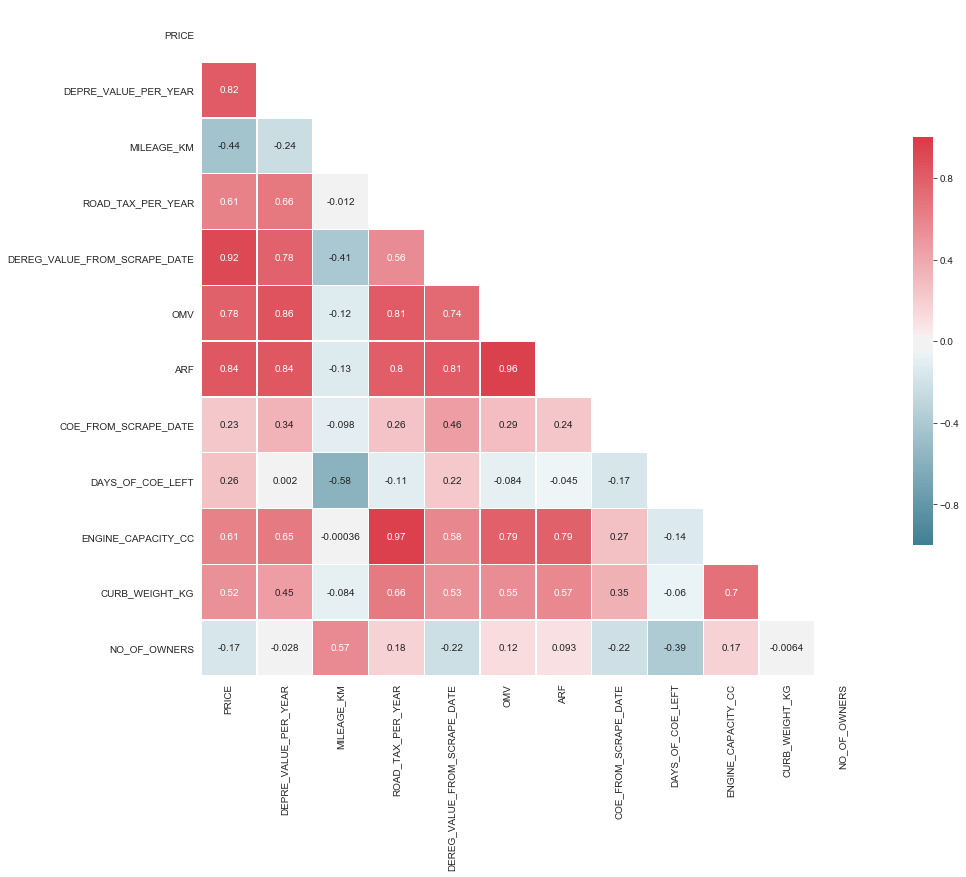

In [23]:
# Compute the correlation matrix
corr = df_clean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1.0, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

bottom, top = ax.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

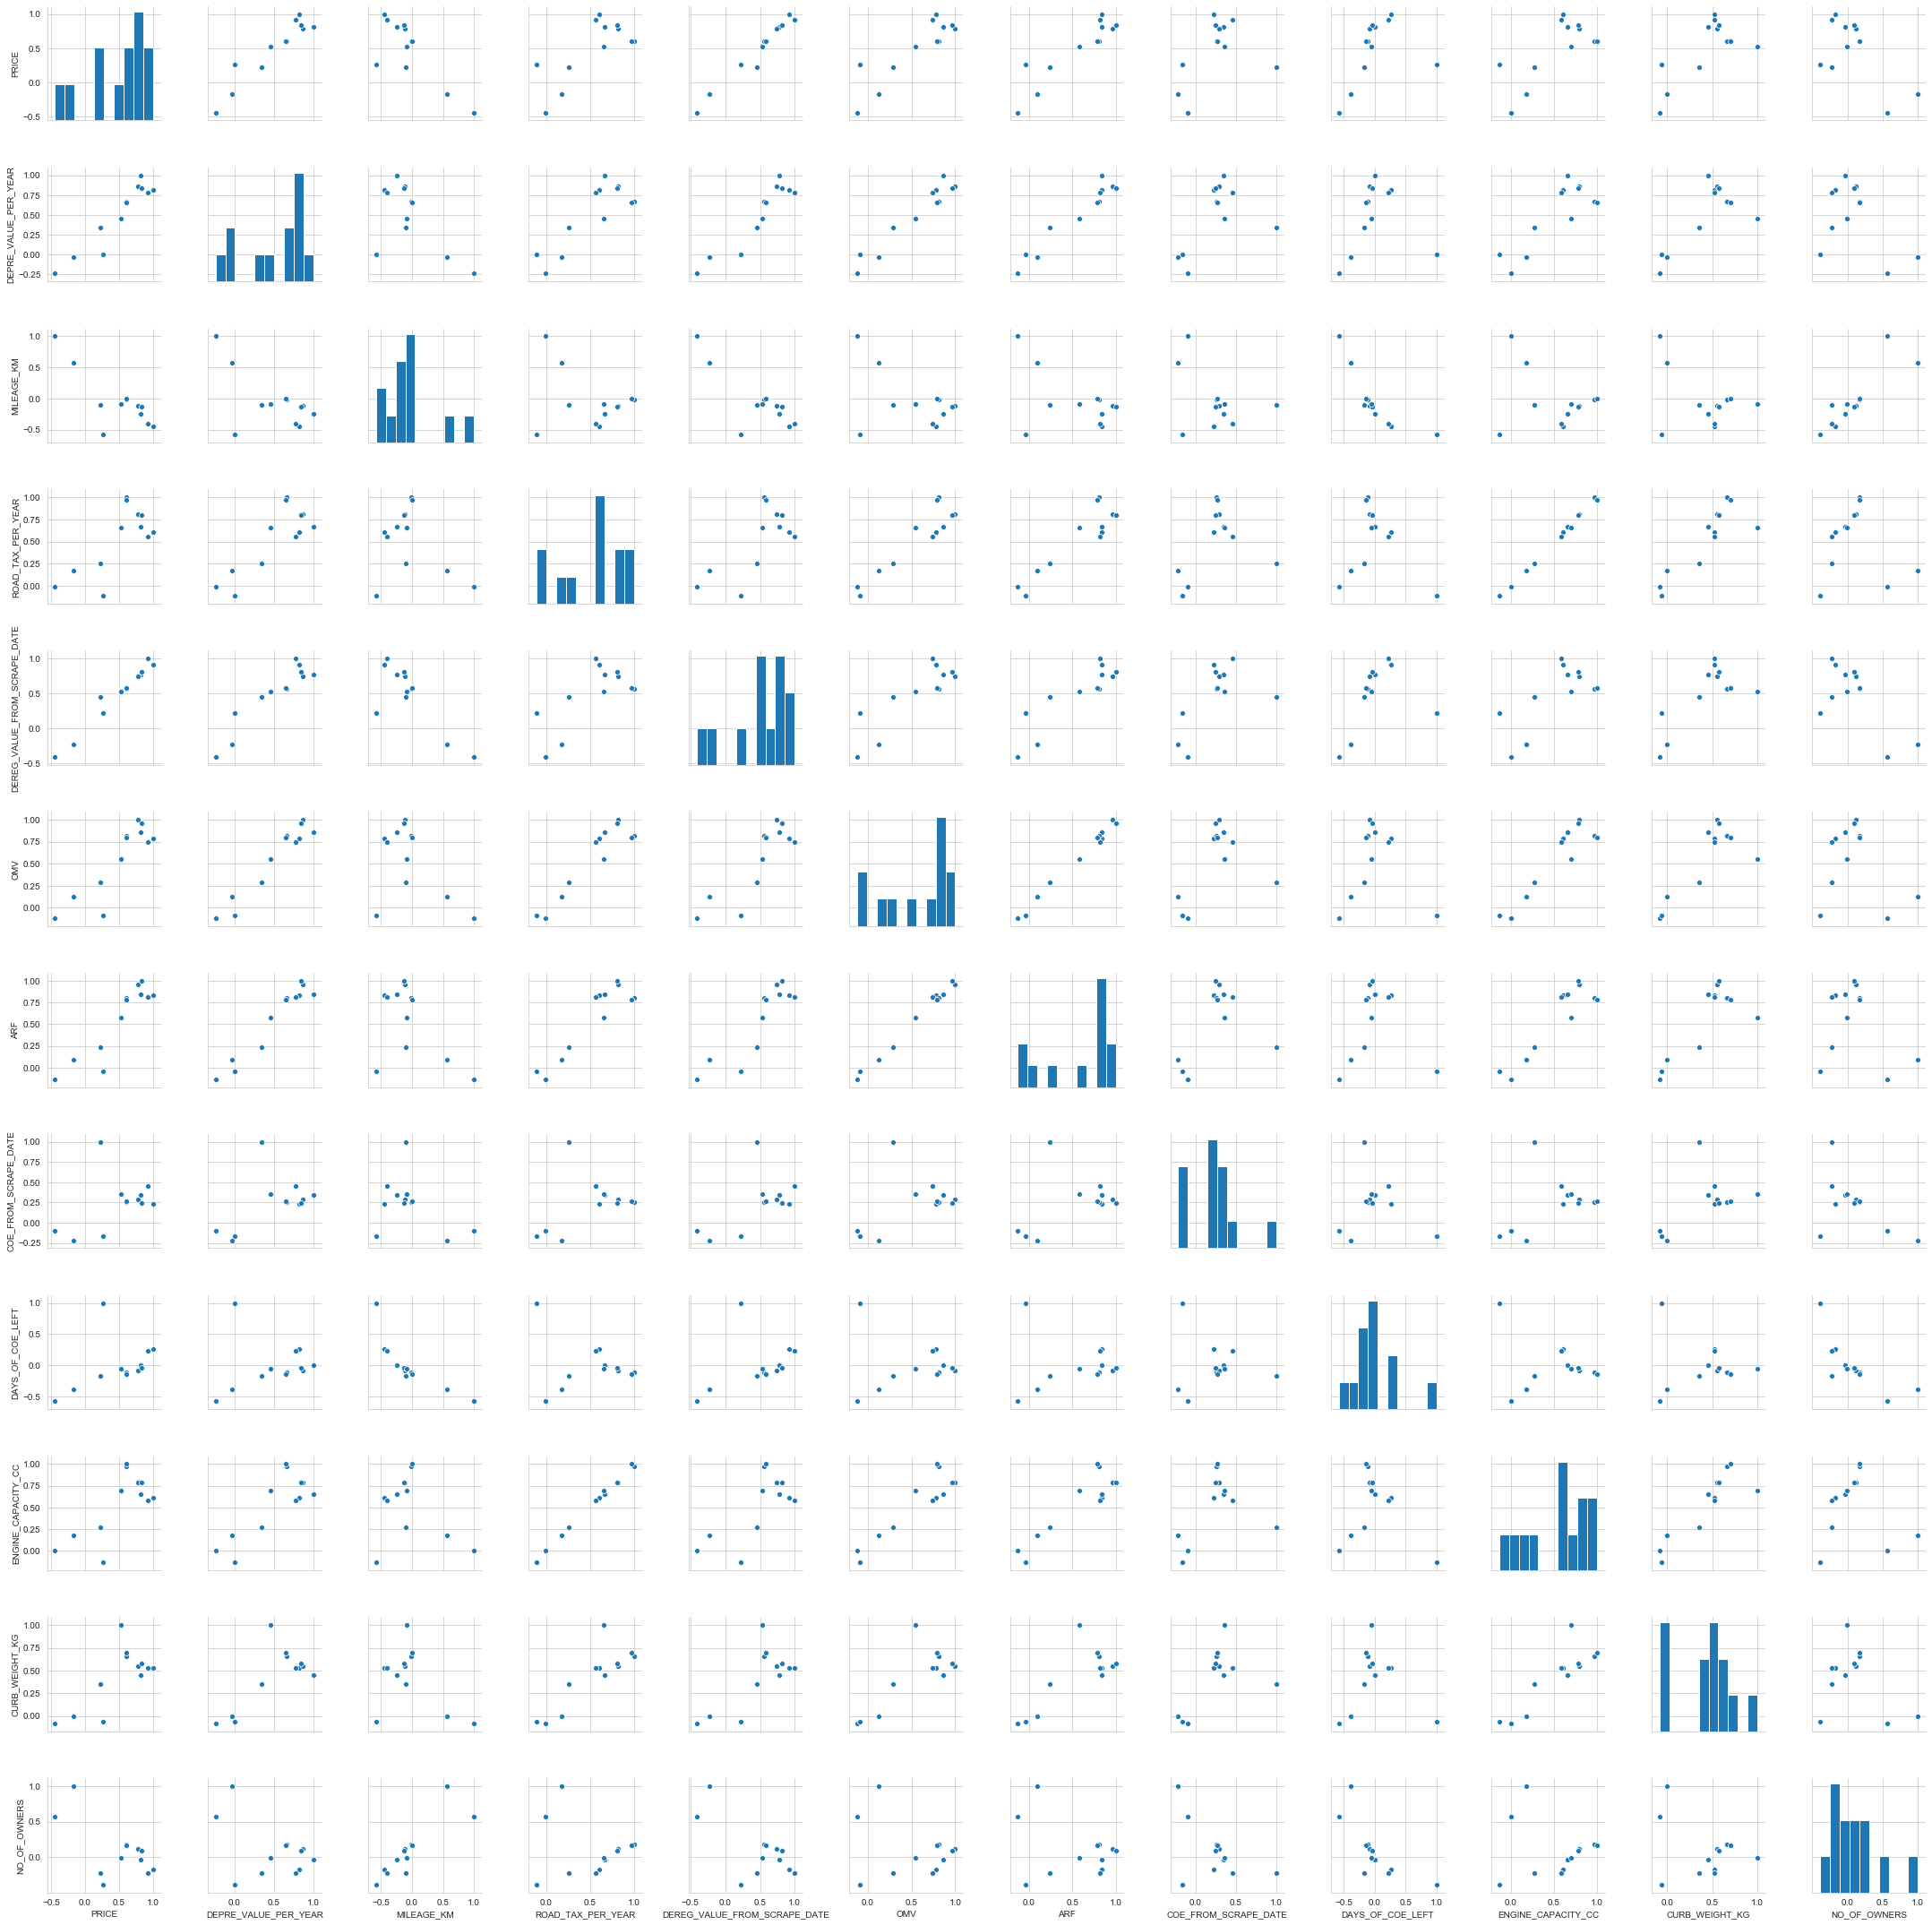

In [26]:
sns.pairplot(df_clean.corr())

In [ ]:
# 

(12.0, 0.0)

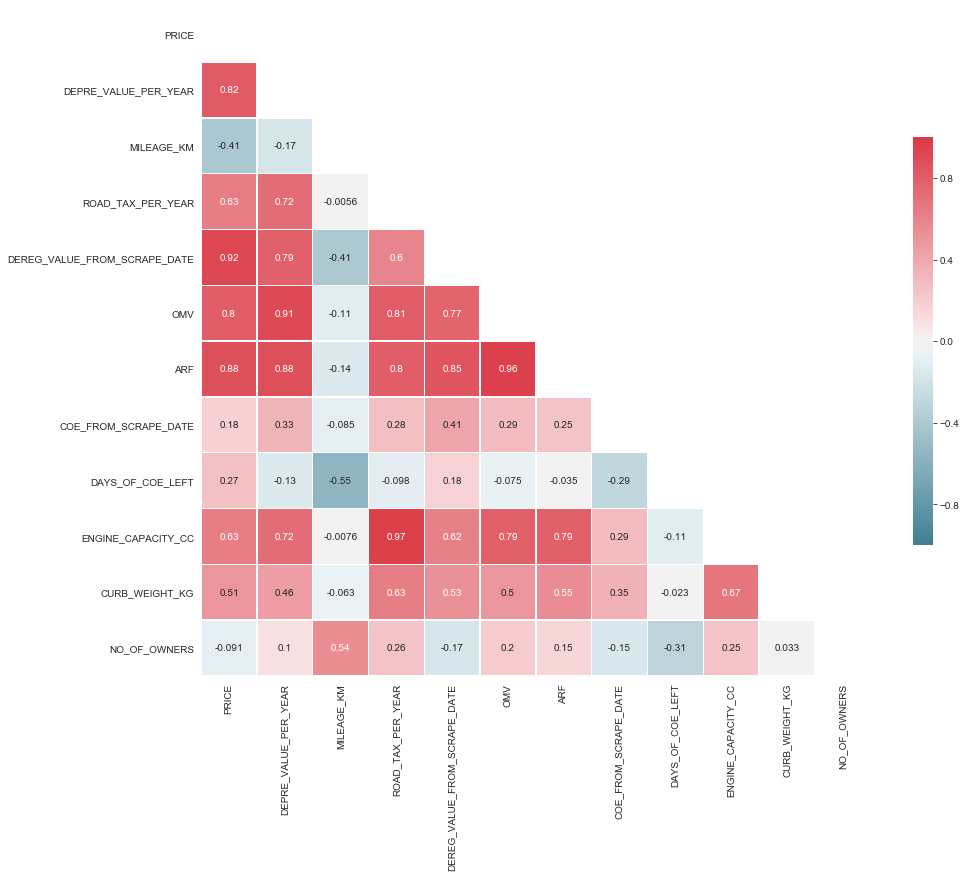

In [43]:
# Compute the correlation matrix
corr = df_clean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1.0, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

bottom, top = ax.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 3 to 3985
Data columns (total 17 columns):
BRAND                           2584 non-null object
PRICE                           2584 non-null float64
DEPRE_VALUE_PER_YEAR            2584 non-null float64
REG_DATE                        2584 non-null object
MILEAGE_KM                      2584 non-null float64
MANUFACTURED_YEAR               2584 non-null object
ROAD_TAX_PER_YEAR               2584 non-null float64
TRANSMISSION                    2584 non-null object
DEREG_VALUE_FROM_SCRAPE_DATE    2584 non-null float64
OMV                             2584 non-null float64
ARF                             2584 non-null float64
COE_FROM_SCRAPE_DATE            2584 non-null float64
DAYS_OF_COE_LEFT                2584 non-null float64
ENGINE_CAPACITY_CC              2584 non-null int64
CURB_WEIGHT_KG                  2584 non-null float64
NO_OF_OWNERS                    2584 non-null float64
VEHICLE_TYPE                    258

In [49]:
Names1 = {'First_name': ['Jon','Bill','Maria','Emma']}
df = pd.DataFrame(Names1,columns=['First_name'])

df.loc[(df['First_name'] == 'Jon') | (df['First_name'] == 'Bill'), 'name_match'] = 'Match'
df.loc[(df['First_name'] != 'Jon') & (df['First_name'] != 'Bill'), 'name_match2'] = 'Mis-Match'
df

,First_name,name_match,name_match2
0,Jon,Match,NaN
1,Bill,Match,NaN
2,Maria,NaN,Mis-Match
3,Emma,NaN,Mis-Match


In [50]:
del dfd

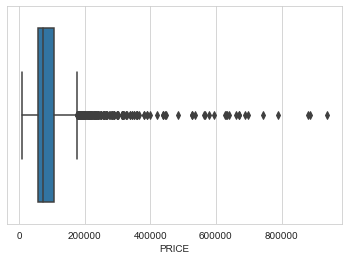

In [51]:
sns.boxplot(x=df_clean['PRICE'])  # Should do a log transformation here

In [46]:
dir()

['In',
 'LinearRegression',
 'Names1',
 'Out',
 'RidgeCV',
 '_',
 '_10',
 '_11',
 '_12',
 '_13',
 '_14',
 '_15',
 '_2',
 '_20',
 '_21',
 '_23',
 '_24',
 '_25',
 '_26',
 '_27',
 '_28',
 '_29',
 '_3',
 '_30',
 '_31',
 '_32',
 '_33',
 '_35',
 '_36',
 '_39',
 '_42',
 '_43',
 '_45',
 '_5',
 '_6',
 '_8',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'ax',
 'bottom',
 'cmap',
 'corr',
 'df',
 'df_clean',
 'df_main',
 'exit',
 'f',
 'get_ipython',
 'heatmap',
 'mask',
 'np',
 'p

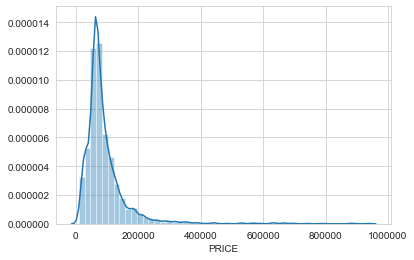

In [53]:
sns.distplot(df_clean['PRICE'])  # Your dependent variable 'must' be normally distributed

In [54]:
df_clean['PRICE_LOG'] = np.log(df_clean['PRICE'])  # This is the power of the log transform

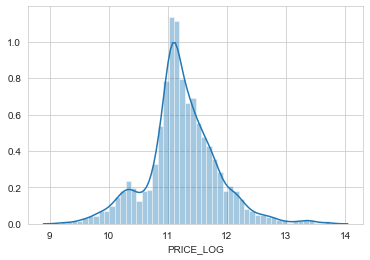

In [55]:
sns.distplot(df_clean['PRICE_LOG'])

## Methodology:
Step 1: Clean DF  
Step 2: Check if predictor variables are normally distributed  
* pd.DataFrame.hist(df, figsize=[15,15])  
  
Step 2.1: Visually check if your predictor variables have some sort of correlation (linear relatonship) with your target y

  
Step 2.1: If they are not, 

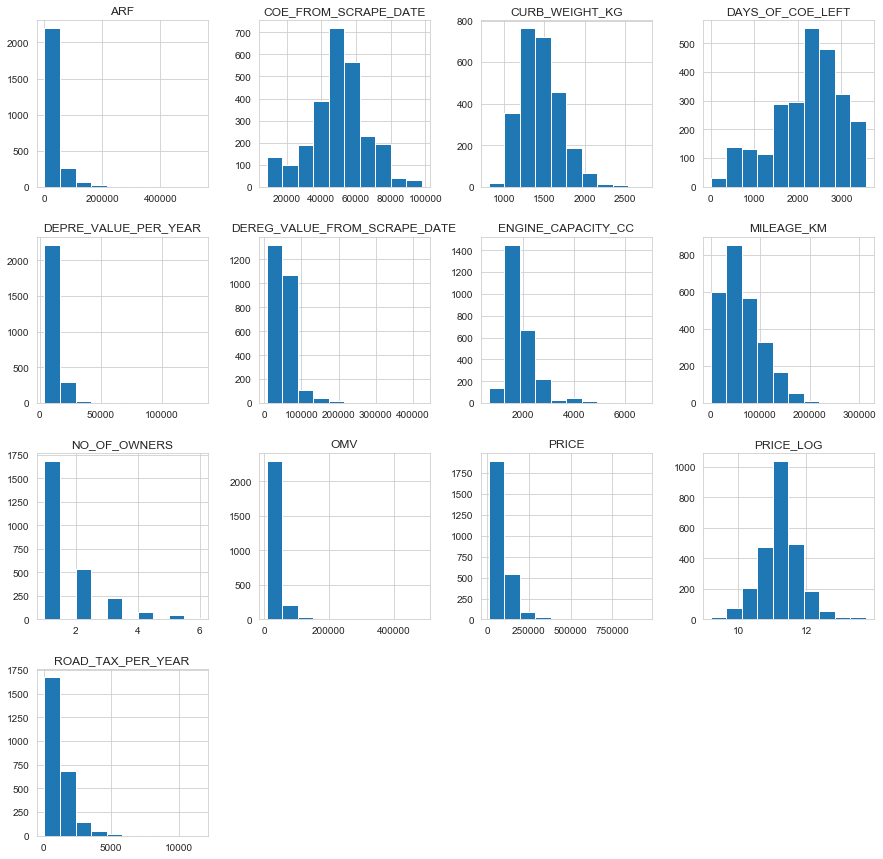

In [57]:
pd.DataFrame.hist(df_clean,figsize=[15,15]); # These are distributions of the variables itself

# y-axis = frequency. How often this occurs
# x-axis = the value of the variable itself

# We use this to check for normality of variables
# Normality = degree of which your variable is normally distributed
# Significance of it being normally distributed = otherwise violating assumptions of OLS

# Transformation is done on variables that are not normally distributed
# log if it's left/right-skewed -> check histogram again (distplot)

# eg. ARF is not reflected of majority of vehicles

In [ ]:
# DEPREciation value can be dropped because it is kind of like another metric of price
# Dereg value is also a function of your price. And this is usually factored into your car

In [ ]:
# Use boxplot to check for outliers

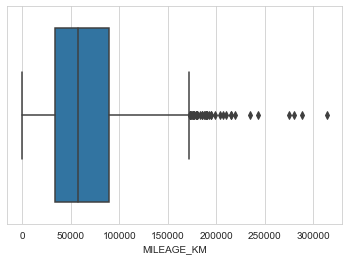

In [69]:
sns.boxplot(df_clean['MILEAGE_KM'])

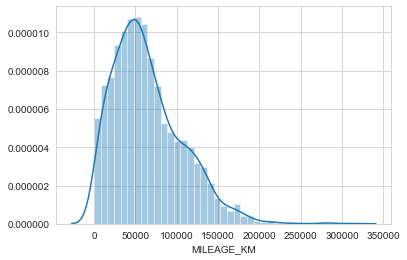

In [68]:
sns.distplot(df_clean['MILEAGE_KM'])

In [33]:
# dropping the rows with these indexes, because .drop works on index
df_clean.drop(df_clean.loc[df_clean['TRANSMISSION'] == 'Manual'].index)  

# Left with 2547 rows in dataset

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
3,Audi,70800.0,16580.0,05-Dec-2011,140800.0,2011,2380.0,Auto,58899.0,71379.0,71379.0,75889.0,761.0,2995,2250.0,3.0,SUV
4,Toyota,65800.0,6850.0,26-Jun-2009,117000.0,2009,974.0,Auto,38024.0,23465.0,23465.0,39563.0,3503.0,1797,1350.0,2.0,MPV
5,Mercedes-Benz,45000.0,18550.0,21-Sep-2010,126000.0,2010,974.0,Auto,31818.0,56154.0,56154.0,41006.0,8.0,1796,1650.0,4.0,Luxury Sedan
7,BMW,70800.0,12680.0,23-Apr-2014,41000.0,2013,742.0,Auto,54685.0,32459.0,27443.0,78810.0,1610.0,1598,1405.0,2.0,Luxury Sedan
9,Audi,89500.0,11910.0,25-Nov-2015,57784.0,2015,624.0,Auto,62640.0,29913.0,33879.0,61103.0,2221.0,1395,1480.0,2.0,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,Mercedes-Benz,103800.0,13470.0,18-Jul-2016,19000.0,2016,740.0,Auto,55704.0,27886.0,26041.0,53694.0,2434.0,1595,1430.0,1.0,Luxury Sedan
3982,Toyota,104500.0,16550.0,02-Jun-2014,47638.0,2014,3100.0,Auto,78422.0,45977.0,56368.0,84504.0,1679.0,3456,2030.0,2.0,MPV
3983,Mercedes-Benz,115000.0,15260.0,11-Mar-2015,51500.0,2012,974.0,Auto,85824.0,52051.0,65692.0,67901.0,1950.0,1796,1600.0,2.0,Sports Car
3984,MINI,119800.0,13150.0,07-Jun-2017,16000.0,2017,1210.0,Auto,69888.0,33570.0,38998.0,53300.0,2769.0,1998,1390.0,1.0,Sports Car


In [ ]:
# df_clean['ENGINE_CAPACITY_CC'] -> Can try categorizing it

In [60]:
df_clean['ARF'].describe()

count      2584.000000
mean      37006.611068
std       46182.599180
min        1316.000000
25%       14719.250000
50%       23706.500000
75%       40801.750000
max      536003.000000
Name: ARF, dtype: float64

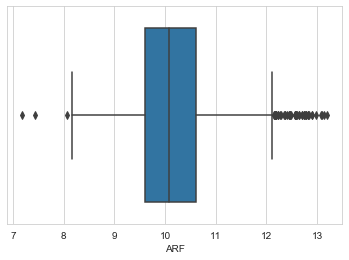

In [65]:
sns.boxplot(np.log(df_clean['ARF']))

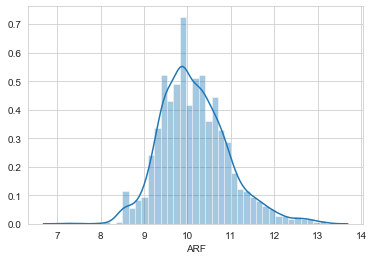

In [64]:
sns.distplot(np.log(df_clean['ARF']))

In [ ]:
sns.distplot(np.l)

In [49]:
df_clean.describe()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS
count,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,92442.819272,12770.305728,64502.158282,1155.412926,53730.590170,34751.988777,37006.611068,49992.115325,2196.682276,1881.769350,1446.806502,1.570820
std,77491.457150,10462.140400,42034.963816,889.314902,35010.161277,36169.097440,46182.599180,16215.045599,815.311996,670.018065,252.064686,0.962527
min,9800.000000,3950.000000,6.000000,50.000000,6653.000000,6510.000000,1316.000000,8501.000000,0.000000,658.000000,810.000000,1.000000
25%,57300.000000,8360.000000,33634.000000,684.000000,38170.500000,18693.500000,14719.250000,40000.000000,1701.750000,1497.000000,1275.000000,1.000000
50%,72800.000000,10435.000000,57000.000000,742.000000,47876.000000,25647.000000,23706.500000,50951.000000,2317.000000,1598.000000,1425.000000,1.000000
75%,104800.000000,13972.500000,89000.000000,1210.000000,60993.500000,36995.500000,40801.750000,58192.750000,2767.000000,1998.000000,1610.000000,2.000000
max,938000.000000,131070.000000,313778.000000,11550.000000,423396.000000,487275.000000,536003.000000,97889.000000,3563.000000,6749.000000,2730.000000,6.000000


In [ ]:
# df.corr() -> just use this to remove predictor variables that are highly correlated
# when do we do lasso/elastic net? (figure it out)

# plot a row in the pairplot () -> separate a df for this pairplot consideration

# Get the correlations with 'price' sorted in descending order
# cars.corr()['price'].sort_values(ascending=False)


# so only take out the target y to predictor variable

In [48]:
# Checking the number of brands in the dataset

# New Column ATAS
# New Column Budget Cars
# Top 20 brands
# Am I comfortable with grouping uncommon cars into others?

print(df_clean.loc[:,'BRAND'],'\n','\n')
print(df_clean.loc[:,'BRAND'].value_counts())
print(len(df_clean.loc[:,'BRAND'].value_counts()))

3                Audi
4              Toyota
5       Mercedes-Benz
7                 BMW
9                Audi
            ...      
3981    Mercedes-Benz
3982           Toyota
3983    Mercedes-Benz
3984             MINI
3985           Nissan
Name: BRAND, Length: 2584, dtype: object 
 

Toyota           405
Mercedes-Benz    374
Honda            309
BMW              286
Mazda            139
Audi             127
Nissan           127
Volkswagen       107
Kia               78
Hyundai           77
Volvo             63
Mitsubishi        58
Subaru            56
Porsche           51
Lexus             49
MINI              40
Suzuki            33
Citroen           22
Jaguar            22
Chevrolet         19
Renault           19
Maserati          18
Land              16
Ford              14
Infiniti          14
Peugeot           13
Ferrari           11
Bentley            6
Lamborghini        6
McLaren            5
Opel               4
Jeep               3
Skoda              3
Rolls-Royce        2

In [ ]:
# Interesting insights from data:
# Mercedes-BENZ actually second highest sold car. Highest resale? More things we can look into for this

In [56]:
# Future Ideas:
# Plot GDP against Trends of bought Mercedes